<a href="https://colab.research.google.com/github/Sharmariyaa/Coronavirus_Tweet_Sentiment_Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_ML_Capstone_Project_Riya_Sharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**     -   **Coronavirus_Tweet_Sentiment_Analysis**

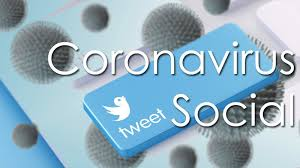

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Person Name**     - Riya Sharma

# **Problem Statement**

**BUSINESS PROBLEM OVERVIEW**

The outbreak of the COVID-19 pandemic has caused significant social, economic, and health impacts globally. With the rapid spread of the virus and the emergence of new variants, social media platforms such as Twitter have become important sources for people to share their thoughts, feelings, and experiences related to the pandemic. Sentiment analysis of tweets related to coronavirus can provide insights into people's attitudes and opinions towards the pandemic, which can help researchers and policymakers in making informed decisions.

The aim of this project is to perform sentiment analysis on a large dataset of tweets related to the coronavirus pandemic. The main objectives are:

**1.  To collect a large dataset of tweets related to the coronavirus pandemic**

**2.  To preprocess and clean the data to remove noise and irrelevant information**

**3.  To classify the tweets into different sentiment categories (positive, negative, or neutral)**

**4.  To analyze the sentiment trends over time and identify any patterns or changes**

**5.  To provide insights and recommendations based on the analysis to help researchers and policymakers in making informed decisions.**

# **General Guidelines** : - 

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


# **Github Link**

# ***Let's Begin !***

## ***1. Know Your Data***

### **Import Libraries**

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image
from collections import Counter

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image # Python Imaging Library
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

### **Dataset Loading**

In [ ]:
path = "/content/drive/MyDrive/Coronavirus Tweets.csv"
df= pd.read_csv(path, encoding = 'latin-1')

###**Dataset First View**

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### **Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


### **Dataset Rows & Columns count**

In [ ]:
#checking Shape of the dataset
df.shape

(41157, 6)

#### **Duplicate Values**

In [ ]:
#checking duplicate rows 
df.duplicated().sum()

0

no duplicate rows in dataset

#### **Missing Values/Null Values**

In [ ]:
# checking Null values
nulls = df.isna().sum().sort_values(ascending=False)
total_elements = df.shape[0]
null_percentage = (df.isnull().sum()/total_elements).sort_values(ascending=False)

null_table = pd.concat([nulls, null_percentage], axis=1, keys=['Total_Missing', 'Missing%'])
null_table.reset_index(inplace=True)
null_table.rename(columns= {"index": " Column_Name"})
print(null_table)

           index  Total_Missing  Missing%
0       Location           8590  0.208713
1       UserName              0  0.000000
2     ScreenName              0  0.000000
3        TweetAt              0  0.000000
4  OriginalTweet              0  0.000000
5      Sentiment              0  0.000000


<Axes: >

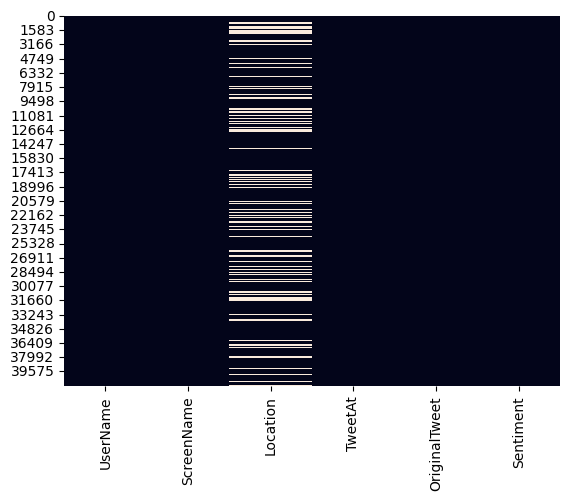

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df['Location'].fillna('Unknown', inplace = True)

In [ ]:

df.isna().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

### What did you know about your dataset?

The dataset given is a dataset from covid 19 tweets, and we have to analysis the sentiments and the insights behind it.

In our dataset 41157 rows(records) and 6 columns(features) are present.

Location feature have 8590 null value present that is 20.8% But this feature is not so much important for our sentiment analysis. Hence we will fill these null values with unknown.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UserName,41157.0,NaN,NaN,NaN,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,NaN,NaN,NaN,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0
Location,41157,12220,Unknown,8593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TweetAt,41157,30,20-03-2020,3448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OriginalTweet,41157,41157,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sentiment,41157,5,Positive,11422,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Variables Description** 

**UserName**: This is the username(encoded in number) unique for every datapoints

**ScreenName**: This is the ScreenName(encoded in number) unique for every datapoints

**Location**: places wherefrom tweets are comming

**TweetAt**: date of tweets data collected

**OriginalTweet**: Original tweets are stored (This feature is more important in our analysis)

**Sentiment**: types of sentiment (Positive, Negative, Neutral, Extremely Positive, Extremely Negative) it is dependent variable.

UserName , ScreenName features are not useful in our analysis, let's drop them

In [ ]:
#dropping UserName and ScreenName features
df = df.drop(['UserName', 'ScreenName'], axis=1)

### Check Unique Values for each variable.

In [ ]:
#checking unique value feature-wise
df.nunique()

Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [ ]:
#checking Unique values
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

## ***Data Wrangling and Data Vizualization***

In [ ]:
#checking unique value in TweetAt feature
df['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

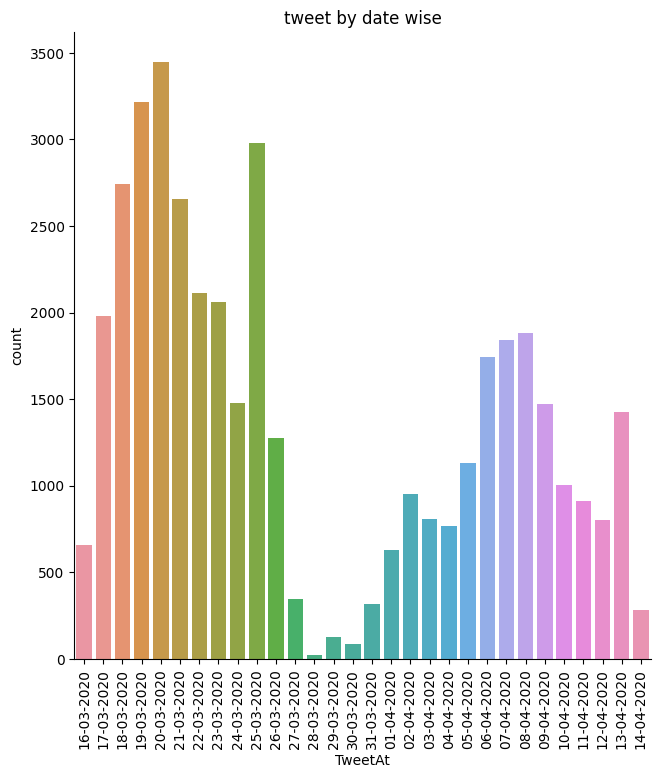

In [ ]:
#visualize tweet by date wise
sns.catplot(x='TweetAt',kind = 'count',height=7,data = df)
plt.xticks(rotation = 90)
plt.title('tweet by date wise')
plt.show()

Most number of tweets done on 20 March 2020 when covid 19 is spreading tremendously. 

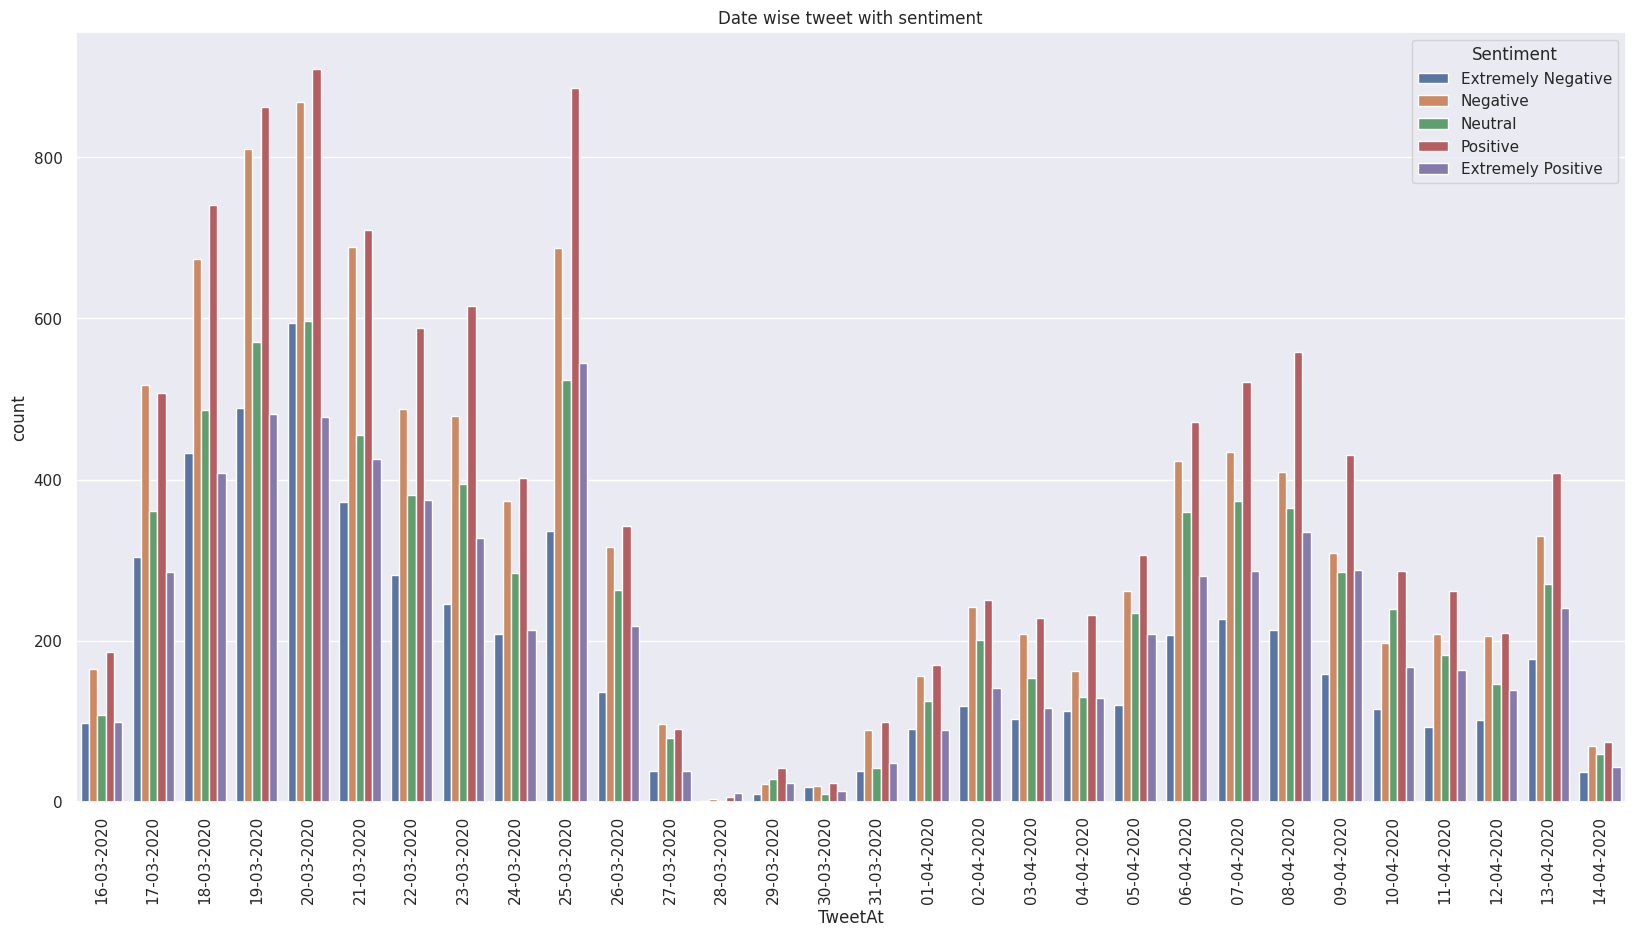

In [ ]:
#visualize tweet by date wise with Sentiment
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='TweetAt',hue='Sentiment',data = df, hue_order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])
plt.title('Date wise tweet with sentiment')
plt.xticks(rotation = 90)
plt.show()
     

### **Tweet Count For Each Sentiment**

In [ ]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


There are five types of Sentiment in this Dataset: Positive, Negative, Neutral, Extremely Positive, Extremely Negative


# **Sentiment Distribution**

Text(0, 0.5, 'count')

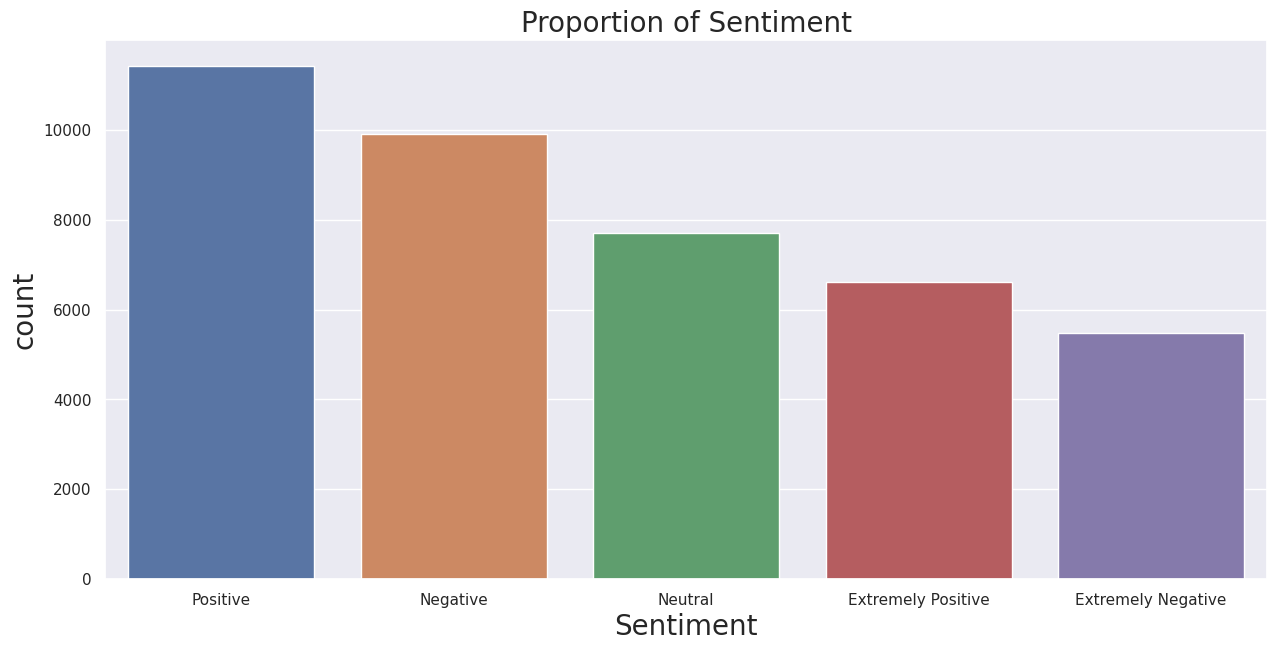

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

**Number of "Positive" sentiments are higher than all other sentiments**

### **We map these sentiment into 3 values for better results**

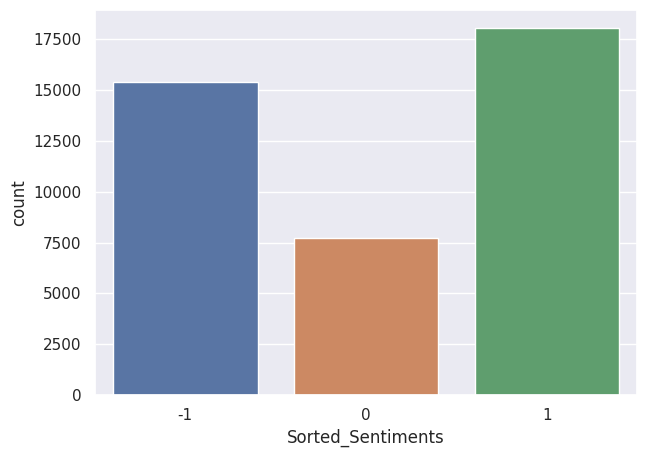

In [ ]:
# There are 5 categories of sentiments in the section, let's convert them to 3 main categories
df['Sorted_Sentiments'] = df['Sentiment'].replace({'Extremely Positive': 1 , 'Positive': 1, 'Extremely Negative': -1, 'Negative': -1, 'Neutral': 0})
plt.figure(figsize=(7,5))
sns.countplot(x='Sorted_Sentiments',data= df)
plt.show()

In [ ]:
df['Sorted_Sentiments'].value_counts()

 1    18046
-1    15398
 0     7713
Name: Sorted_Sentiments, dtype: int64

# **Locations with most of the tweets**

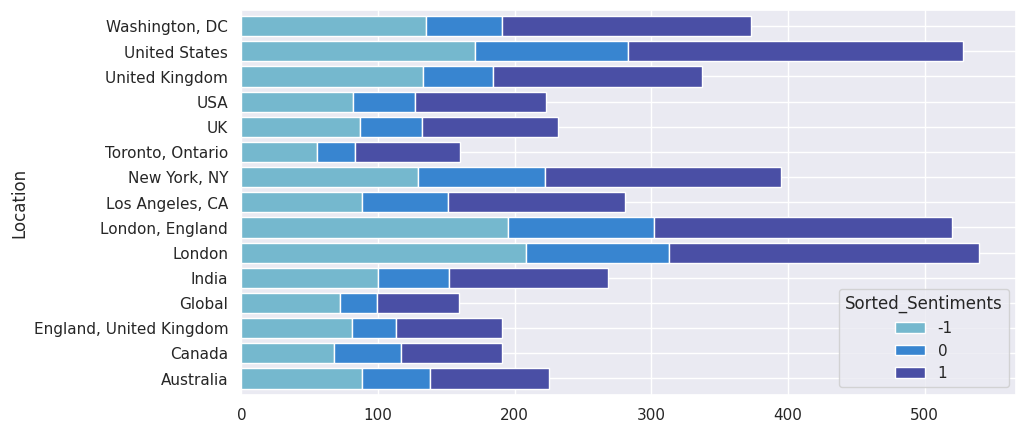

In [ ]:
# sorting Locations w.r.t most number tweets has been made
tweet_lococations = df[df['Location'].isin(df['Location'].value_counts()[1:16].index)]
# Now Ploting
pd.crosstab(tweet_lococations.Location, tweet_lococations.Sorted_Sentiments).plot.barh(stacked=True,width=0.8, color=sns.color_palette("icefire", 9))
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show() 

Most number of tweets tweeted in London and United States.

In [ ]:
#top 10 location wise tweets
top_10_loc = df['Location'].value_counts().head(10)
top_10_loc_df = pd.DataFrame(top_10_loc)
top_10_loc_df.reset_index(inplace=True)
top_10_loc_df = top_10_loc_df.rename(columns={'index':'Location', 'Location':'Tweet_count'})
top_10_loc_df

,Location,Tweet_count
0,Unknown,8593
1,London,540
2,United States,528
3,"London, England",520
4,"New York, NY",395
5,"Washington, DC",373
6,United Kingdom,337
7,"Los Angeles, CA",281
8,India,268
9,UK,232


Seems, like London had most no of tweets made during the 2020. Both Most of number of Nagetive and positive tweets has been made from London itself while Americans were on second place for there presence in Twitter.

Speaking of locations, Most of the tweets has been made anonumly or without a location share, which contribute around 21% of the total tweets made globelly. On the second place, It is London and London, England both contributed around 2.5% of total tweets made globelly.


In [ ]:
top_10_loc_df1 = top_10_loc_df.drop([0],axis=0)

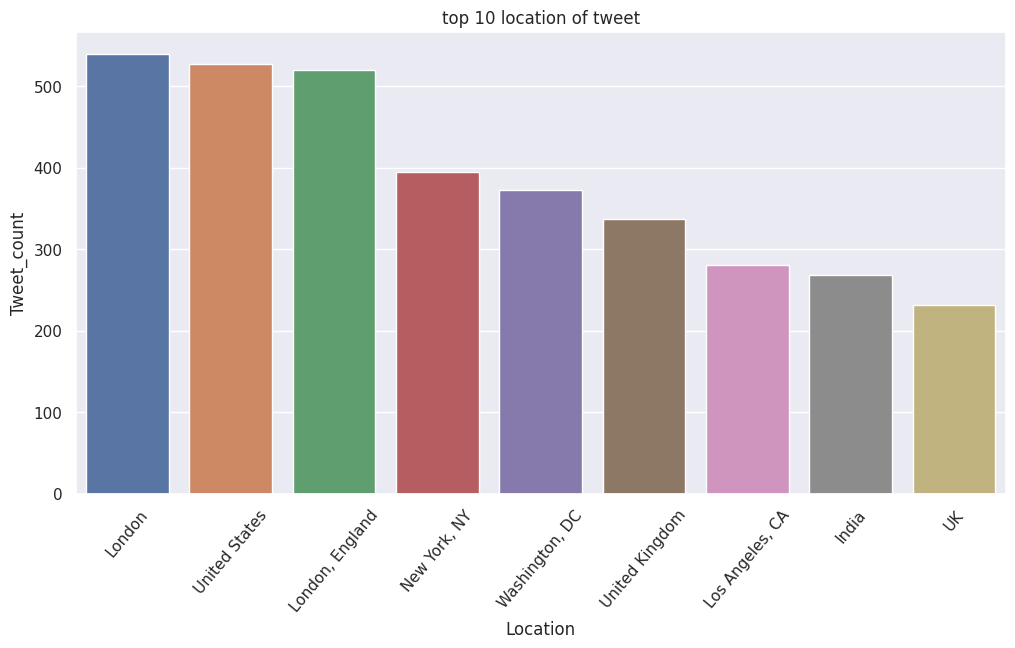

In [ ]:
#visualize top 10 location wise tweets
plt.subplots(figsize=(12,6))
plt.title('top 10 location of tweet')
sns.barplot(x='Location',y='Tweet_count',data = top_10_loc_df1)
plt.xticks(rotation = 50)
plt.show()


# **Locations with most number of Negative Tweets made**

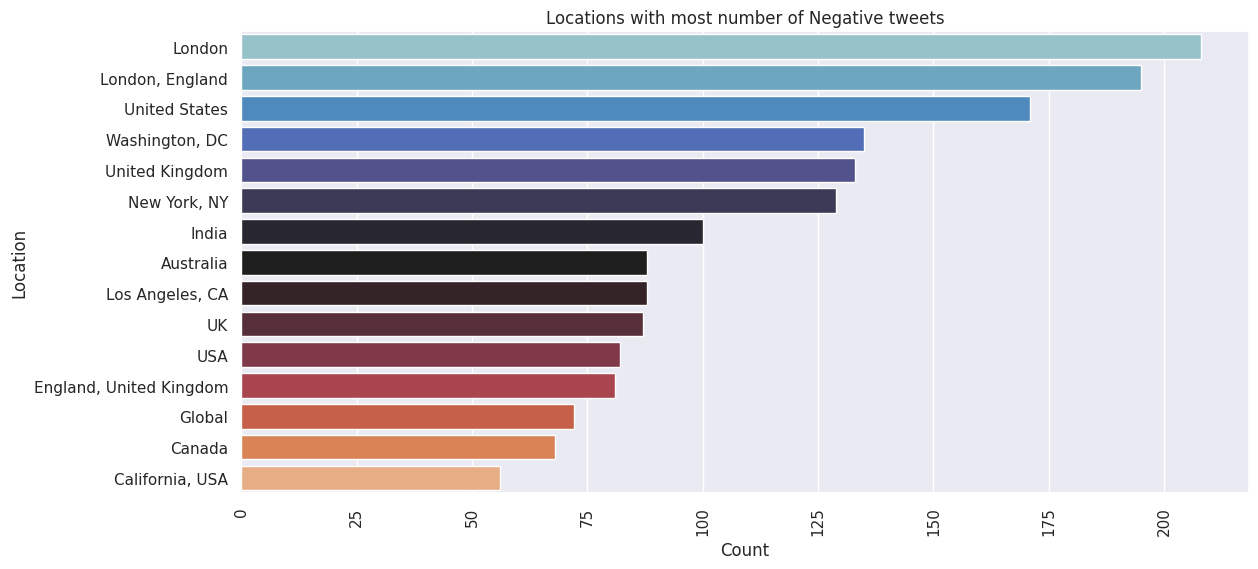

In [ ]:
# Ploting a bar chart with seaborn
nag_tweet_log = df.loc[df['Sorted_Sentiments'] == -1]
nag_tweet_location = nag_tweet_log['Location'].value_counts().reset_index().rename(columns={'index':'Location','Location':'Count'})

# Using matplotlib to plot a line chart to vitualize the data above 
sns.barplot(y = nag_tweet_location['Location'][1:16], x= nag_tweet_location['Count'][1:16], palette=('icefire'))
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(13,6)
plt.title('Locations with most number of Negative tweets')
plt.show()


# **Locations with most number of Positive Tweets made**

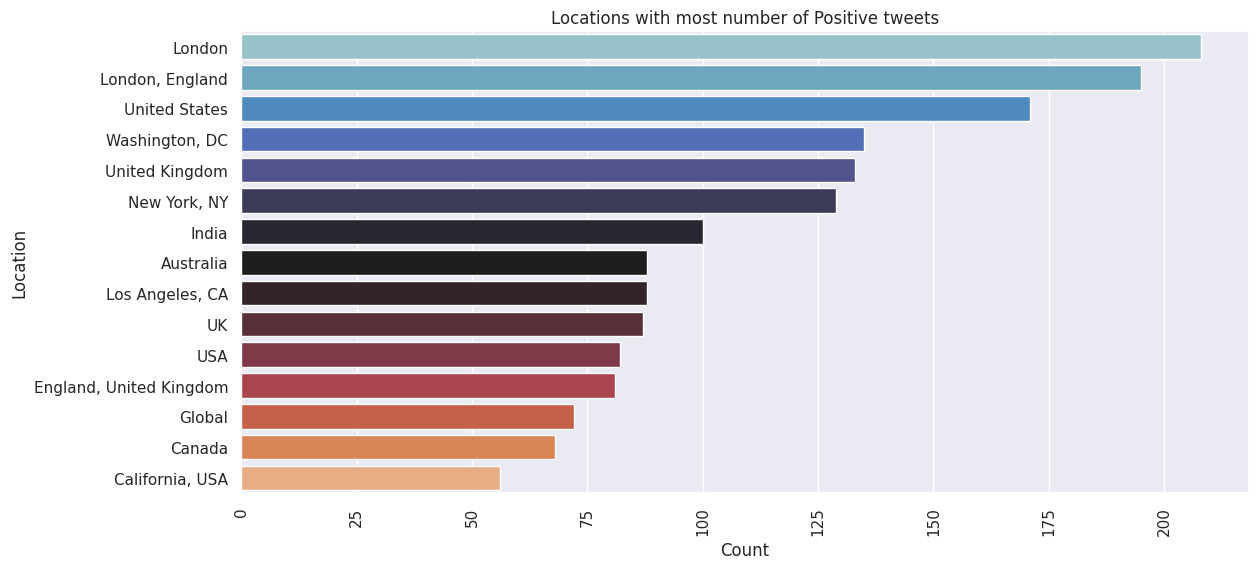

In [ ]:
# Ploting a bar chart with seaborn
pos_tweet_log = df.loc[df['Sorted_Sentiments'] == 1]
pos_tweet_location = nag_tweet_log['Location'].value_counts().reset_index().rename(columns={'index':'Location','Location':'Count'})

# Using matplotlib to plot a line chart to vitualize the data above 
sns.barplot(y = pos_tweet_location['Location'][1:16], x= pos_tweet_location['Count'][1:16], palette=('icefire'))
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(13,6)
plt.title('Locations with most number of Positive tweets')
plt.show()


Make a new datframe of 3 columns.

In [ ]:
df1=df[['OriginalTweet','Sentiment','Sorted_Sentiments']]

In [ ]:
df1.head()

,OriginalTweet,Sentiment,Sorted_Sentiments
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,advice Talk to your neighbours family to excha...,Positive,1
2,Coronavirus Australia: Woolworths to give elde...,Positive,1
3,My food stock is not the only one which is emp...,Positive,1
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,-1


# **Data Preprocessing**


### Text Cleaning

Text cleaning is the process of preparing raw text for any kind of machine learning model so that they/machines can understand human language. Gathering, sorting, and preparing data is the most important step in the data analysis process – bad data can have cumulative negative effects downstream if it is not corrected.

### **Convert to LowerCase :**

In [ ]:
df1["OriginalTweet"] = df["OriginalTweet"].str.lower()
df1['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41155    is it wrong that the smell of hand sanitizer i...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

### **Removing Punctuations :**

In [ ]:
df1['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [ ]:
df1['OriginalTweet'] = df1['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

In [ ]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
df1["clean_tweets"] = df1['OriginalTweet'].apply(remove_punctuations)

In [ ]:
df1['clean_tweets']

0                   menyrbie philgahan chrisitv  and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when kameronwilds...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for 70...
Name: clean_tweets, Length: 41157, dtype: object

In [ ]:
df1['clean_tweets'] = df1['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
df1.head() 

,OriginalTweet,Sentiment,Sorted_Sentiments,clean_tweets
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,0,menyrbie philgahan chrisitv and and
1,advice talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...
2,coronavirus australia: woolworths to give elde...,Positive,1,coronavirus australia woolworths to give elder...
3,my food stock is not the only one which is emp...,Positive,1,my food stock is not the only one which is emp...
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,-1,me ready to go at supermarket during the covid...


In [ ]:
df1['clean_tweets'][0]

'menyrbie philgahan chrisitv  and  and '

### **Removing Stop Words :**

In [ ]:
#Importing Stop-words
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
#function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [ ]:
df1['clean_tweets']= df1['clean_tweets'].apply(lambda x: remove_stopwords(x))

In [ ]:
df1.clean_tweets[6]

['cashier',
 'grocery',
 'store',
 'sharing',
 'insights',
 'covid',
 'prove',
 'credibility',
 'commented',
 'im',
 'civics',
 'class',
 'know',
 'im',
 'talking']

### **Stemming**

Stemming is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems.

Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling.

The most commonly used stemming technique in sentiment analysis is **Porter Stemmer**. It is a rule-based algorithm that removes common endings from words, such as -ing, -ed, or -ly, and replaces them with a root word. It is also used to reduce the size of the vocabulary and make it easier to analyze.

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [ ]:
#function for stemming
def stemming(text):    
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [ ]:
df1['stemmed'] = df1['clean_tweets'].apply(lambda x: stemming(x))

In [ ]:
#result
df1.stemmed.head()

0                           menyrbi philgahan chrisitv
1    advic talk neighbour famili exchang phone numb...
2    coronaviru australia woolworth give elderli di...
3    food stock one empti pleas dont panic enough f...
4    readi go supermarket covid outbreak im paranoi...
Name: stemmed, dtype: object

### **Lemmatization**

 Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down to its root meaning to identify similarities.

  Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. 

The most commonly used lemmatization technique for sentiment analysis is the **WordNet Lemmatizer**. It uses a dictionary-based approach for lemmatization that is based on the WordNet database. The WordNet Lemmatizer looks up words in the WordNet database and assigns them to the correct lemma.

In [ ]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df1['lemmed'] = df1['clean_tweets'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [ ]:
for i in range(len(df1['lemmed'])):
    df1['lemmed'][i] = ' '.join(df1['lemmed'][i])
     

In [ ]:
df1.head()

,OriginalTweet,Sentiment,Sorted_Sentiments,clean_tweets,stemmed,lemmed
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,0,"[menyrbie, philgahan, chrisitv]",menyrbi philgahan chrisitv,menyrbie philgahan chrisitv
1,advice talk to your neighbours family to excha...,Positive,1,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice talk neighbour family exchange phone nu...
2,coronavirus australia: woolworths to give elde...,Positive,1,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,coronavirus australia woolworth give elderly d...
3,my food stock is not the only one which is emp...,Positive,1,"[food, stock, one, empty, please, dont, panic,...",food stock one empti pleas dont panic enough f...,food stock one empty please dont panic enough ...
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,-1,"[ready, go, supermarket, covid, outbreak, im, ...",readi go supermarket covid outbreak im paranoi...,ready go supermarket covid outbreak im paranoi...


### **Observation** : 
**Lemmatization is the grouping together of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results.**

In [ ]:
df1['temp_list'] = df1['clean_tweets'].apply(lambda x:str(x).split())

In [ ]:
from collections import Counter 
top = Counter([item for sublist in df1['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,"'covid',",18286
1,"'coronavirus',",12991
2,"'prices',",7406
3,"'store',",6626
4,"'food',",6612
5,"'supermarket',",6410
6,"'grocery',",5790
7,"'people',",5067
8,"'amp',",4912
9,"'consumer',",4085


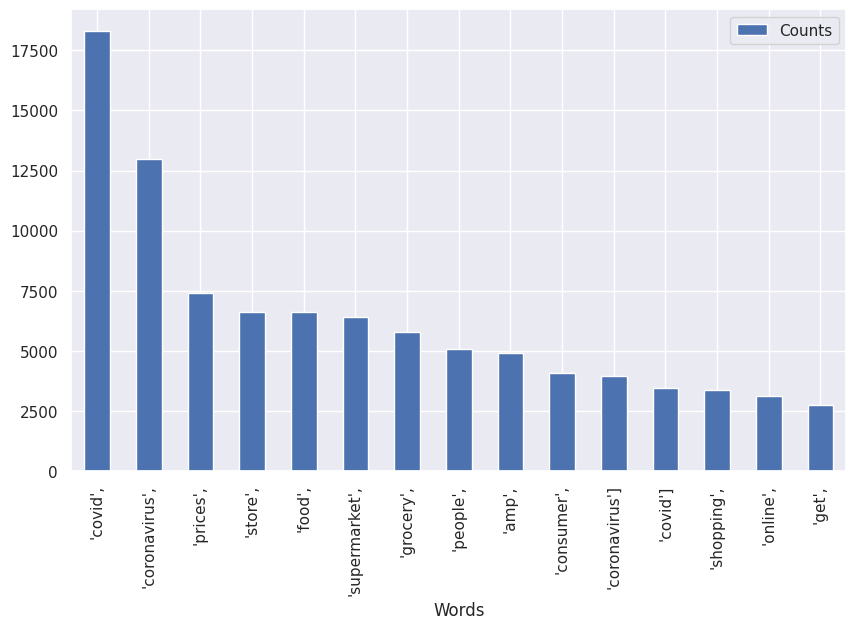

In [ ]:
# Activating collections library for filtering words in tweets
# looping to get most used words
count = Counter()
for list in df1['temp_list'].values:
  for item in list:
    count[item] += 1
        
text_list = count.most_common(15)
# ploting a bar graph
plt.rcParams["figure.figsize"] = (10,6)
pd.DataFrame(text_list, columns=['Words','Counts']).set_index('Words').plot(kind='bar')
plt.show()

### **Obeservation** : 
**Word such as 'Covid' and 'Coronavirus' are having large number of frequency  present in our dataset.**

# **Word cloud**

In [ ]:
# Get all the pozitive and negative tweets
Positive = df1[df1.Sorted_Sentiments == 1]
Negative = df1[df1.Sorted_Sentiments == -1]
Neutral = df1[df1.Sorted_Sentiments == 0]
# Create numpy list to visualize using wordcloud
positive_text = " ".join(Positive.lemmed.to_numpy().tolist())
negative_text = " ".join(Negative.lemmed.to_numpy().tolist())
neutral_text = " ".join(Neutral.lemmed.to_numpy().tolist())

### **Word cloud for Neutral Sentiments**

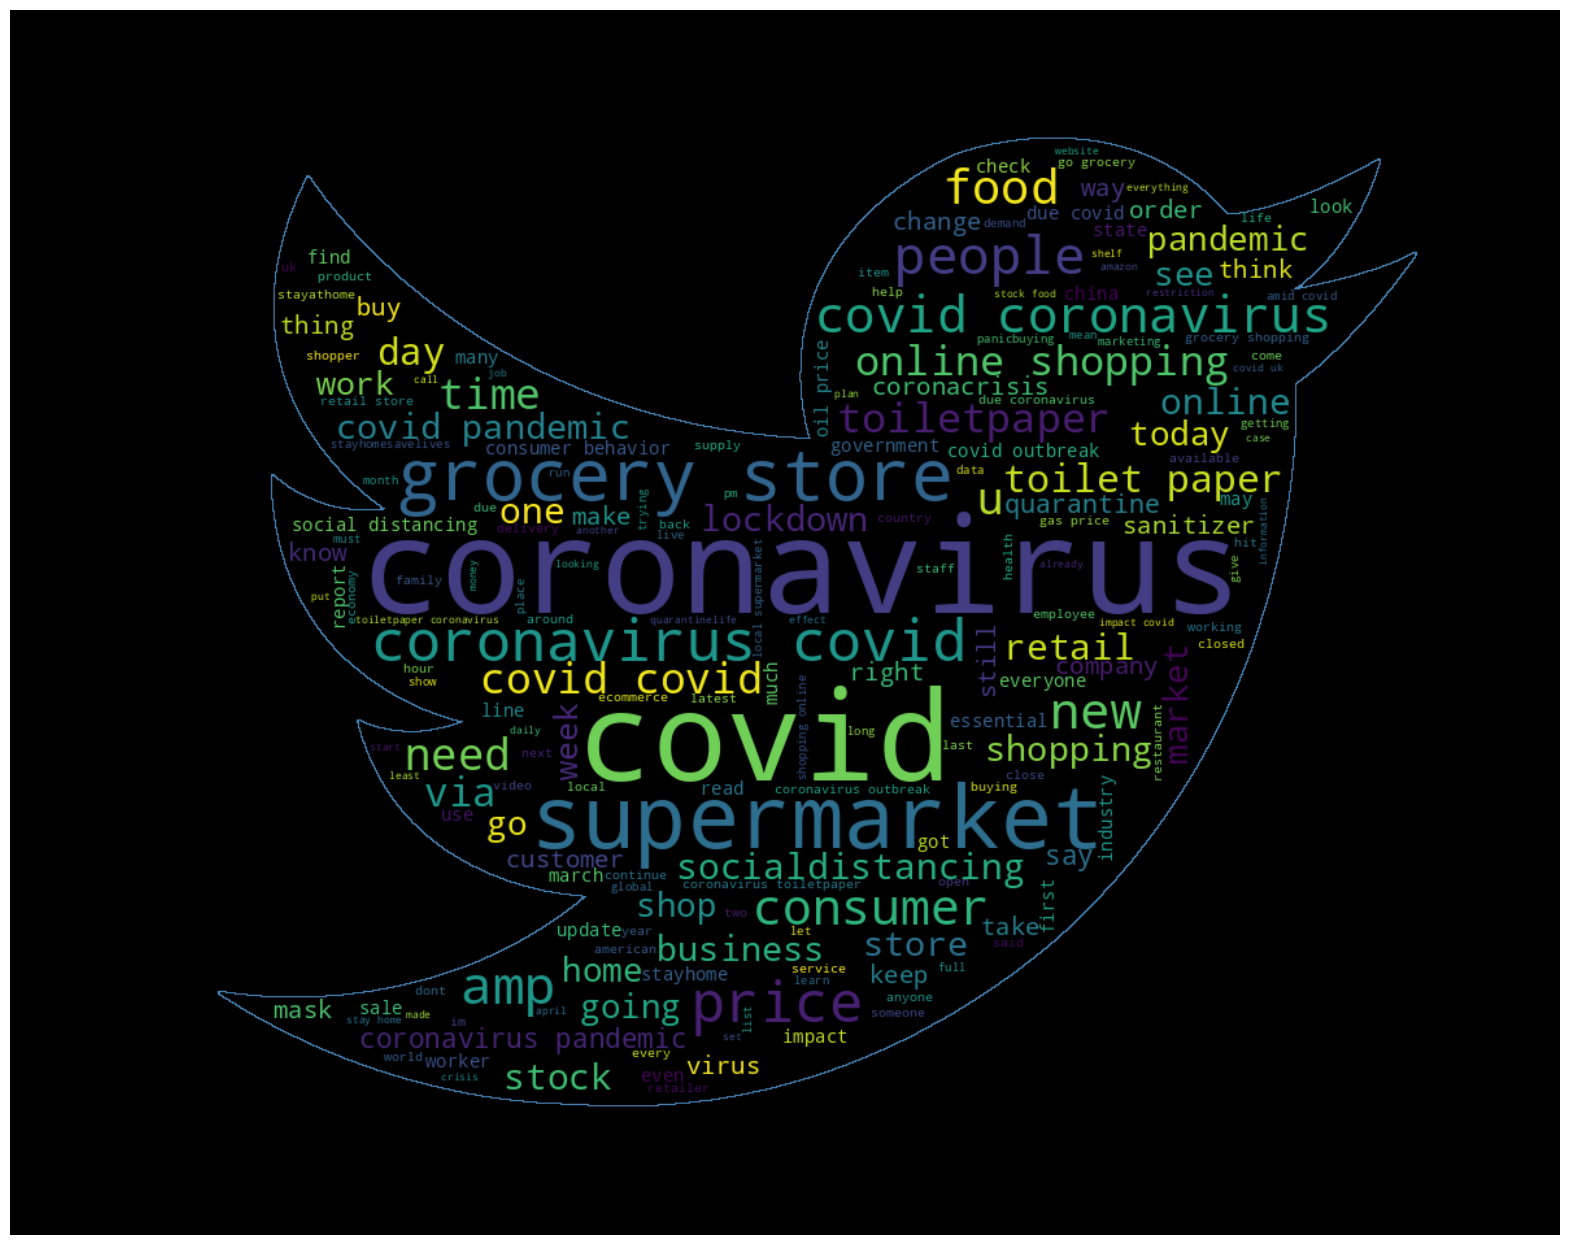

In [ ]:
mask = np.array(Image.open("/content/drive/MyDrive/Twitter-Transparent.png"))



wc = WordCloud(background_color='black', mask= mask,contour_width=1,contour_color='steelblue')
wc.generate(neutral_text)
plt.figure(figsize=(20,20))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

### **Word cloud for Positive Sentiments**

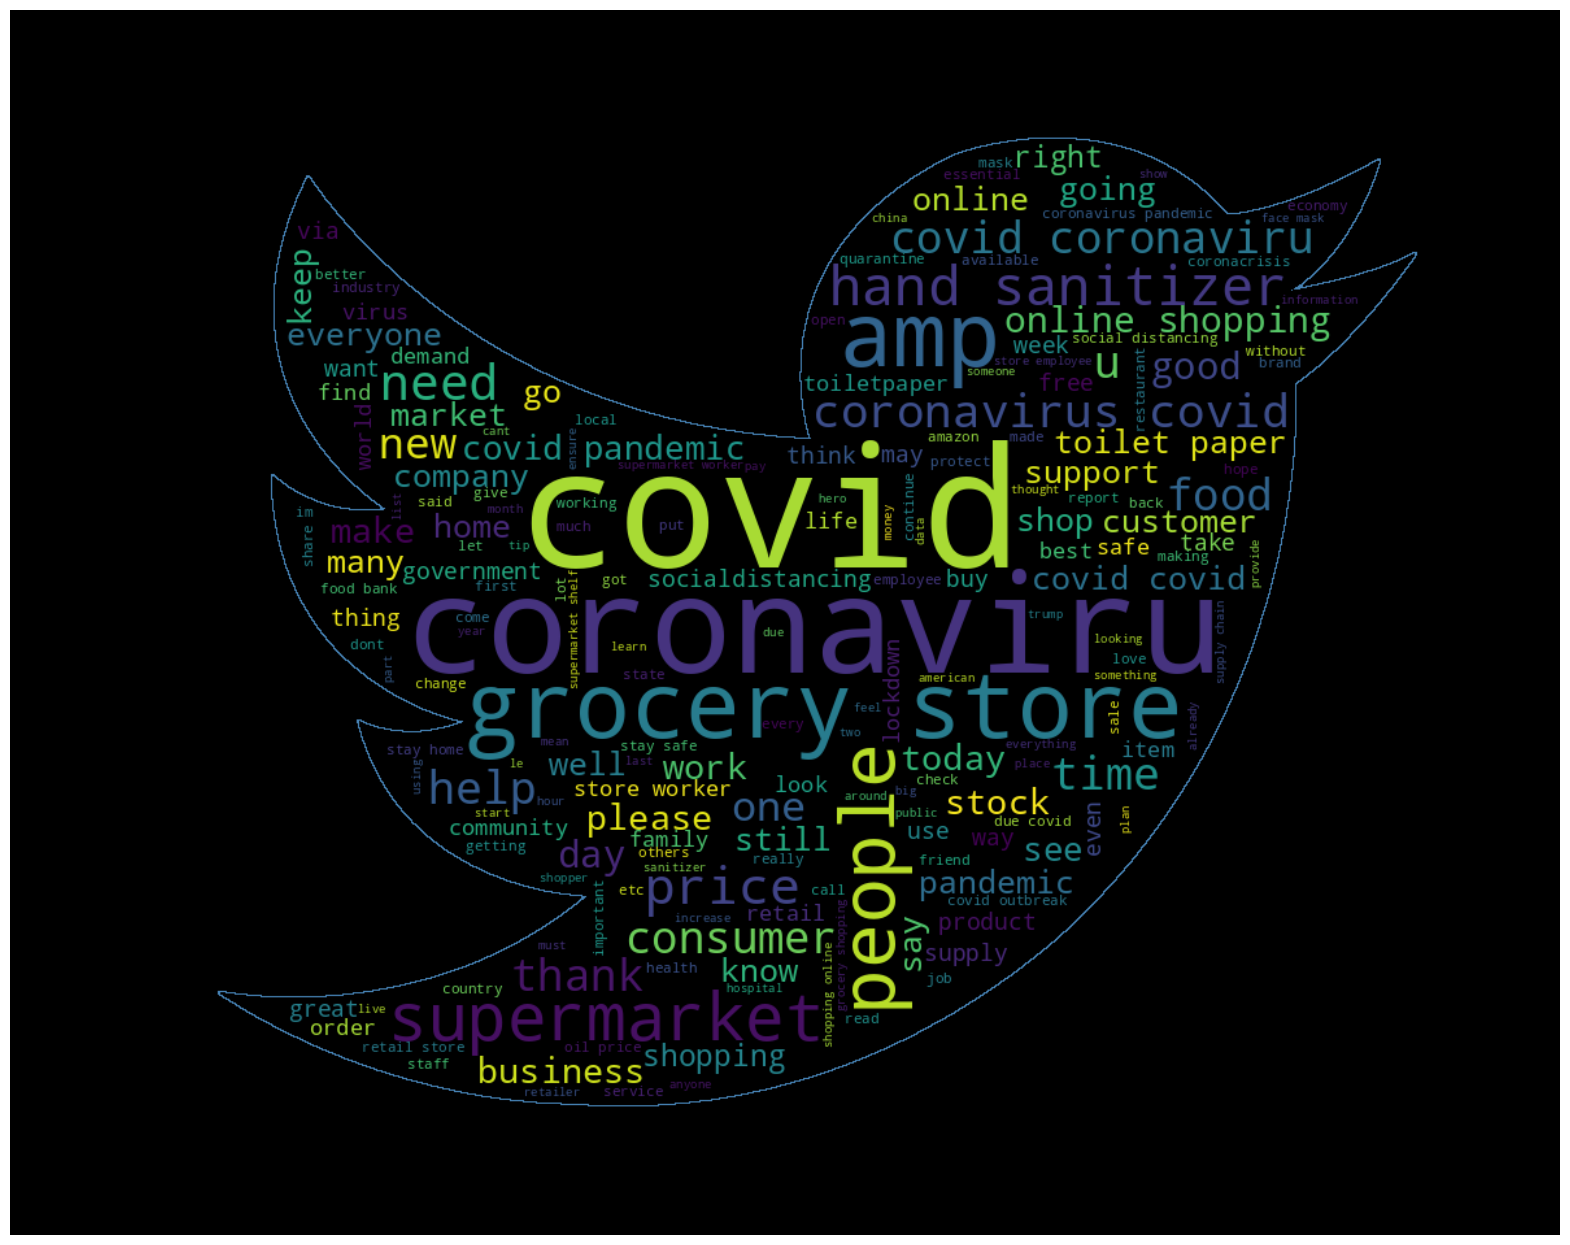

In [ ]:
mask = np.array(Image.open("/content/drive/MyDrive/Twitter-Transparent.png"))



wc = WordCloud(background_color='black', mask= mask,contour_width=1,contour_color='steelblue')
wc.generate(positive_text)
plt.figure(figsize=(20,20))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

### **Word cloud for Negative Sentiments**

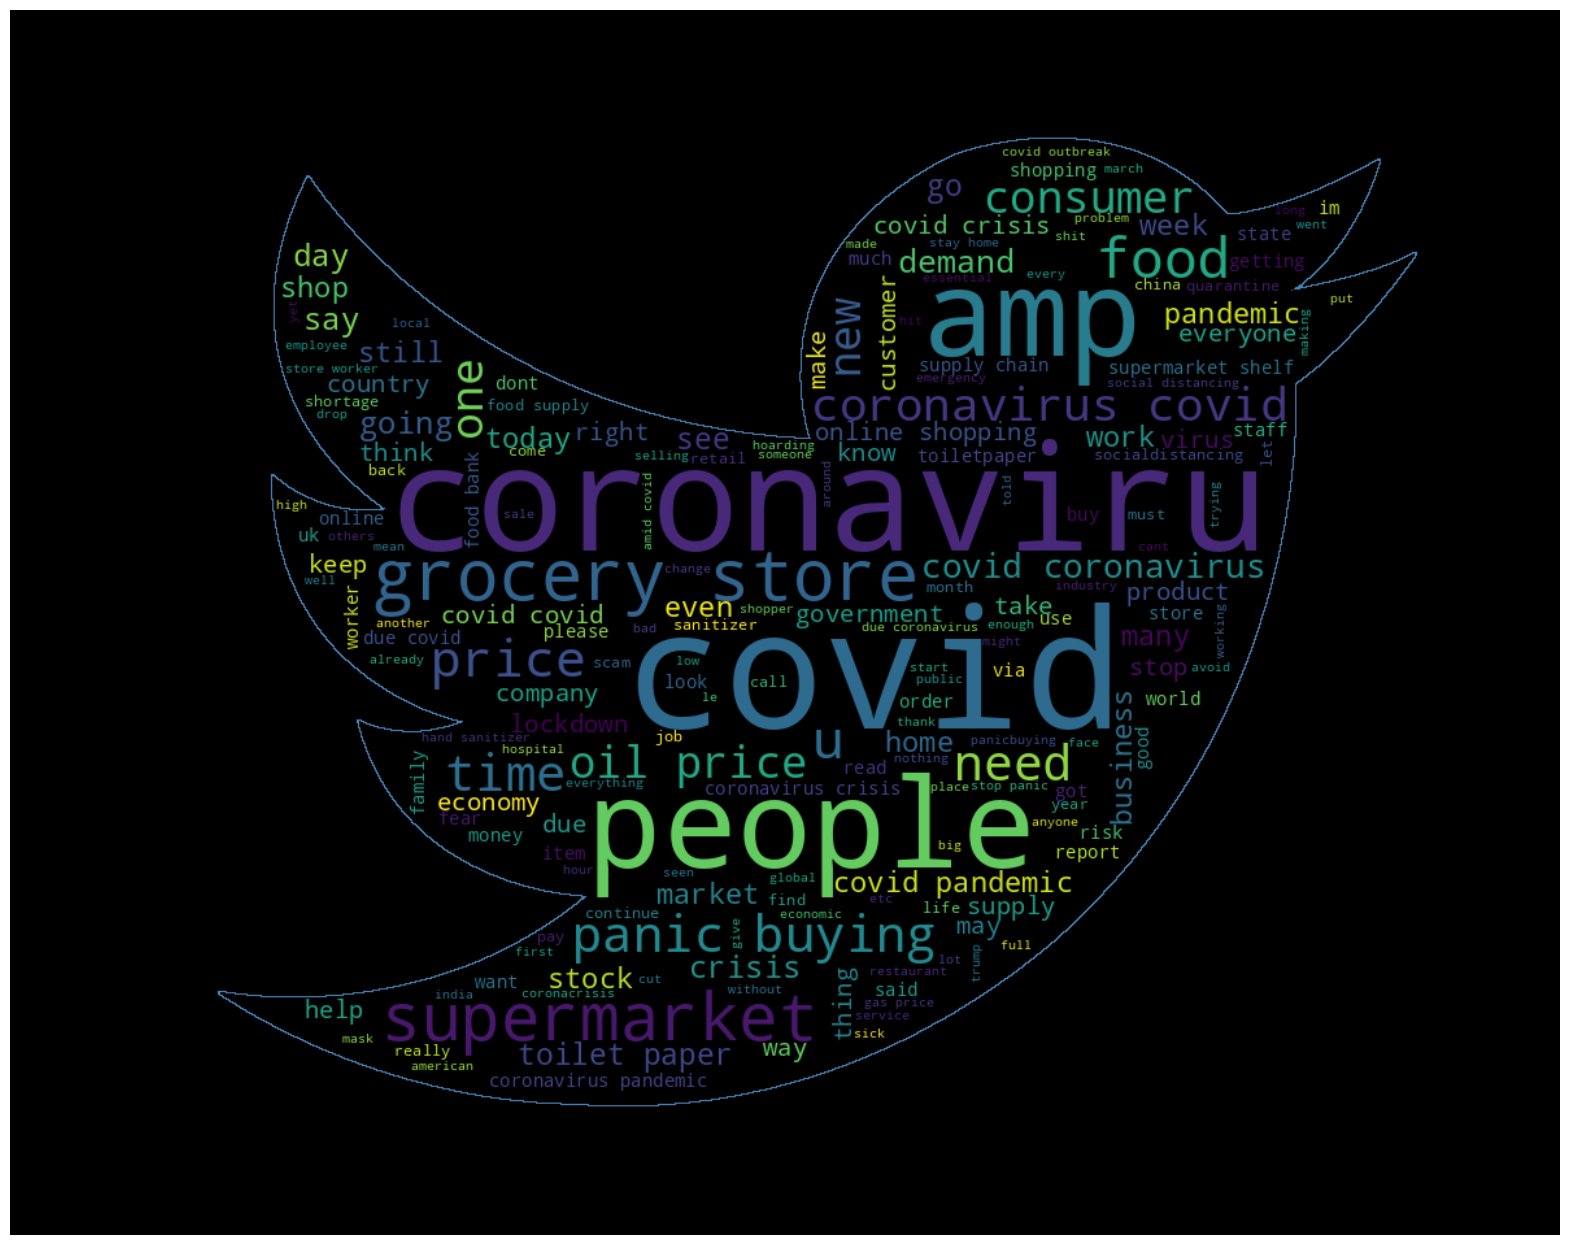

In [ ]:
mask = np.array(Image.open("/content/drive/MyDrive/Twitter-Transparent.png"))



wc = WordCloud(background_color='black', mask= mask,contour_width=1,contour_color='steelblue')
wc.generate(negative_text)
plt.figure(figsize=(20,20))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

# **Hashtag**

In [ ]:
#function for extracting hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

### **How many hashtags are there in a tweet?**

In [ ]:
#counting total hashtags in dataset
total_hashtag = hashtag_extract(df1['OriginalTweet'])
total_hashtag = sum(total_hashtag, [])
print(f'{len(total_hashtag)} hashtags in entire dataset')


81151 hashtags in entire dataset


## **Average Tweet Text Length**

In [ ]:
df1['text_length'] = df1['clean_tweets'].apply(len)
#Calculate average length by label types
labels = df1.groupby('Sorted_Sentiments').mean().round(1)
labels

,text_length
Sorted_Sentiments,
-1,18.7
0,14.0
1,19.0


In [ ]:
# replacing values
df1['sentiments'] = df1['Sentiment'].replace({ 'Extremely Positive': 'positive' , 'Positive': 'positive', 'Extremely Negative': 'negative', 'Negative': 'negative', 'Neutral': 'neutral'})


In [ ]:
df1.head()

,OriginalTweet,Sentiment,Sorted_Sentiments,clean_tweets,stemmed,lemmed,temp_list,text_length,sentiments
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,0,"[menyrbie, philgahan, chrisitv]",menyrbi philgahan chrisitv,menyrbie philgahan chrisitv,"[['menyrbie',, 'philgahan',, 'chrisitv']]",3,neutral
1,advice talk to your neighbours family to excha...,Positive,1,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice talk neighbour family exchange phone nu...,"[['advice',, 'talk',, 'neighbours',, 'family',...",27,positive
2,coronavirus australia: woolworths to give elde...,Positive,1,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,coronavirus australia woolworth give elderly d...,"[['coronavirus',, 'australia',, 'woolworths',,...",12,positive
3,my food stock is not the only one which is emp...,Positive,1,"[food, stock, one, empty, please, dont, panic,...",food stock one empti pleas dont panic enough f...,food stock one empty please dont panic enough ...,"[['food',, 'stock',, 'one',, 'empty',, 'please...",24,positive
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,-1,"[ready, go, supermarket, covid, outbreak, im, ...",readi go supermarket covid outbreak im paranoi...,ready go supermarket covid outbreak im paranoi...,"[['ready',, 'go',, 'supermarket',, 'covid',, '...",23,negative


# **Train-Test Split**

The vary first step towards, Model implimentation is to divide the dataset into train and test sets so that after traing the data set to the model, we can validate the algorithic process with a untouched set.

**Stemming is usually used for training and testing in sentiment analysis. Lemmatization is often used for more accurate results, but it is more computationally expensive and time-consuming than stemming.Stemming is used for training in order to make the model more general and less prone to overfitting.**

In [ ]:
#Assigning dependent and independent features
X= df1['stemmed']
y=df1['sentiments']

In [ ]:
# Spliting the data in Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
print("X_train set : ", X_train.shape)
print("X_test set : ", X_test.shape)
print("y_train set : ", y_train.shape)
print("y_test set : ", y_test.shape)

X_train set :  (28809,)
X_test set :  (12348,)
y_train set :  (28809,)
y_test set :  (12348,)


In [ ]:
#checking splitted data
print(X_train.head())
y_train.head()

9600     white bean soup w tuscan kale smoke ham stock ...
1158     onlin shop cancel big holiday plan april due c...
32416    although saw less list compar time last year o...
23603    help friend stock food essenti famili car got ...
37704    sinc noth today go shop onlin play video game ...
Name: stemmed, dtype: object


9600      neutral
1158     positive
32416     neutral
23603    positive
37704    positive
Name: sentiments, dtype: object

# **TF-IDF (Term Frequency–Inverse Document Frequency)**

It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

TFIDF is better suited for text analysis, as it takes into account the importance of certain words, while Count Vectorizer simply counts the occurrence of words. 

Count vectorizer is a way of tokenizing and counting the occurrences of each word in a document. The result is a sparse matrix with the number of occurrences of each word in the document.

TF-IDF is a better way of representing documents for use in text analysis than count vectorizer, as it takes into account the importance of words in the context of the document. This makes it more suitable for tasks such as sentiment analysis and topic modeling. In the case of Covid-19 tweet analysis, TF-IDF can be used to identify important topics in tweets related to the pandemic, such as effects on the economy, health and social life, or to determine the sentiment of tweets related to the pandemic.

In [ ]:
# TF-IDF >> Convert a collection of raw documents to a matrix of TF-IDF features.

IDF_vec = TfidfVectorizer(norm = None)
# Applying vectorization on features
X_train_vectorized = IDF_vec.fit_transform(X_train)
X_test_vectorized = IDF_vec.transform(X_test)

print("the shape of out text train TFIDF vectorizer ",X_train_vectorized.get_shape())
print("the shape of out text test TFIDF vectorizer ",X_test_vectorized.get_shape())
print("The type of count vectorizer ", type(IDF_vec))

the shape of out text train TFIDF vectorizer  (28809, 36511)
the shape of out text test TFIDF vectorizer  (12348, 36511)
The type of count vectorizer  <class 'sklearn.feature_extraction.text.TfidfVectorizer'>


# **Model Implimentation**

Following are some of driver functions that I have used for the Model Evaluation.

In [ ]:
def model_evaluation(model, true, predicted):
  
  """Function which gives output of the model implimentation on train 
  and test set (Used as Output Display) """

  train_accuracy = model.score(X_train_vectorized, y_train)
  test_accuracy = accuracy_score(true, predicted)
  report = classification_report(predicted, true)

  print(model,'\n')
  print('Train set Accuracy: ',round((train_accuracy), 2)*100,'%')
  print('Test set Accuracy: ',round((test_accuracy), 2)*100,'%')
  print('Model Report: \n', report)
  print('------------------------------------------------------------------\n')
  print('Confusion Matrix: \n')
  cm = metrics.confusion_matrix(true, predicted)
  cm = cm / np.sum(cm, axis = 1)[:,None]
  labels = y.unique()
  sns.set(rc={'figure.figsize':[5,4]})
  sns.heatmap(cm, xticklabels = labels,
            yticklabels = labels, 
            annot=True, 
            cmap = 'YlGnBu')
  plt.show()
  plt.pause(0.05)

In [ ]:
def performance_metrics(model, true, predicted):
  
  """ Function which evaluates the model and saves the data 
  (Used for making a Comparison table) """

  train_accuracy = model.score(X_train_vectorized, y_train)
  test_accuracy = accuracy_score(true, predicted)
  f1_accuracy = f1_score(true, predicted, average=None)

  return round((train_accuracy), 2)*100, round((test_accuracy), 2)*100, np.round(f1_accuracy, 3)

# **Multiclass classification**

Whether it’s spelled multi-class or multiclass, the science is the same. Multiclass classification is a machine learning classification task that consists of more than two classes, or outputs.

We are given a set of training samples separated into K distinct classes (In this dataset it is POSITIVE, NEGATIVE & NEUTRAL sentiments) and we create an ML model to forecast which of those classes some previously unknown data belongs to. The model learns patterns specific to each class from the training dataset and utilizes those patterns to forecast the classification of future data.

Some of the most popular algorithms for multi-class classifications that we will be using in this project:





**Multinomial Naive Bayes Classifier**

**SVC (Support Vector Classifier**)

**AdaBoosted Decision Trees**

**Multinomial Logistic Regression**

**Random Forest Classifier** 

**Knn(K nearest neighbour)**

# **Naive Bayes Classifier**

It is a classification model based on conditional probability and uses Bayes theorem to predict the class of unknown datasets.

MultinomialNB() 

Train set Accuracy:  88.0 %
Test set Accuracy:  64.0 %
Model Report: 
               precision    recall  f1-score   support

    negative       0.69      0.64      0.67      4990
     neutral       0.43      0.53      0.48      1890
    positive       0.69      0.68      0.69      5468

    accuracy                           0.64     12348
   macro avg       0.61      0.62      0.61     12348
weighted avg       0.65      0.64      0.65     12348

------------------------------------------------------------------

Confusion Matrix: 



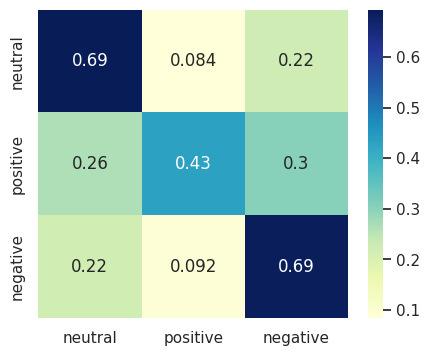

In [ ]:
# # Base Model
naiveByes_clf  = MultinomialNB()
naiveByes_clf.fit(X_train_vectorized, y_train)

# prediction
NB_prediction = naiveByes_clf.predict(X_test_vectorized)

# Base Report
model_evaluation(naiveByes_clf, y_test, NB_prediction)

In [ ]:
# creating a dataframe to store results
results_df = pd.DataFrame(data=[["Naive Bayes Classifier", *performance_metrics(naiveByes_clf, y_test, NB_prediction)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])


# **SVM (Support Vector Machine)**

Support vector machines (SVMs) are powerful yet flexible supervised machine learning methods used for classification, regression, and, outliers’ detection. The main goal of SVMs is to divide the datasets into number of classes in order to find a maximum marginal hyperplane (MMH).

SVC(max_iter=10000) 

Train set Accuracy:  96.0 %
Test set Accuracy:  78.0 %
Model Report: 
               precision    recall  f1-score   support

    negative       0.78      0.80      0.79      4459
     neutral       0.64      0.71      0.68      2088
    positive       0.85      0.79      0.82      5801

    accuracy                           0.78     12348
   macro avg       0.76      0.77      0.76     12348
weighted avg       0.79      0.78      0.78     12348

------------------------------------------------------------------

Confusion Matrix: 



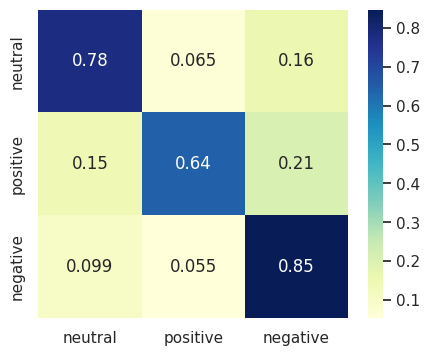

In [ ]:
# Base Model
SVC_Model = SVC(max_iter=10000)
SVC_Model.fit(X_train_vectorized, y_train)

# prediction
SVC_prediction = SVC_Model.predict(X_test_vectorized)

# Report
model_evaluation(SVC_Model, y_test, SVC_prediction)

In [ ]:
# creating a dataframe to store results
results_df_2 = pd.DataFrame(data=[["Support Vector Machine", *performance_metrics(SVC_Model, y_test, SVC_prediction)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])
results_df = results_df.append(results_df_2, ignore_index=True)


# **AdaBoosted Decision Trees**

A decision tree is boosted using the AdaBoost. R2 [1] algorithm on a 1D sinusoidal dataset with a small amount of Gaussian noise. The AdaBoost algorithm involves using very short (one-level) decision trees as weak learners that are added sequentially to the ensemble.

A weak learner is a model that is very simple, although has some skill on the dataset. Boosting was a theoretical concept long before a practical algorithm could be developed, and the AdaBoost (adaptive boosting) algorithm was the first successful approach for the idea.

CPU times: user 42.7 s, sys: 80.1 ms, total: 42.8 s
Wall time: 43.1 s
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=300) 

Train set Accuracy:  85.0 %
Test set Accuracy:  79.0 %
Model Report: 
               precision    recall  f1-score   support

    negative       0.76      0.82      0.78      4270
     neutral       0.79      0.70      0.74      2604
    positive       0.83      0.82      0.82      5474

    accuracy                           0.79     12348
   macro avg       0.79      0.78      0.78     12348
weighted avg       0.79      0.79      0.79     12348

------------------------------------------------------------------

Confusion Matrix: 



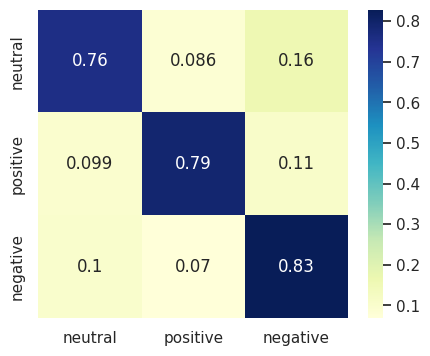

In [ ]:
# Base Model
AdaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=300, learning_rate = 0.5, algorithm="SAMME.R")

%time AdaBoost.fit(X_train_vectorized, y_train)

# prediction
AdaBoost_prediction = AdaBoost.predict(X_test_vectorized)

# Report  
model_evaluation(AdaBoost, y_test, AdaBoost_prediction) 


In [ ]:
# creating a dataframe to store results
results_df_3 = pd.DataFrame(data=[["AdaBoosted Decision Trees", *performance_metrics(AdaBoost, y_test, AdaBoost_prediction)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])
results_df = results_df.append(results_df_3, ignore_index=True)


# **Logistic Regression**

Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. It predicts the output of a categorical dependent variable.

LogisticRegression(multi_class='multinomial') 

Train set Accuracy:  100.0 %
Test set Accuracy:  74.0 %
Model Report: 
               precision    recall  f1-score   support

    negative       0.74      0.76      0.75      4529
     neutral       0.64      0.60      0.62      2438
    positive       0.78      0.79      0.78      5381

    accuracy                           0.74     12348
   macro avg       0.72      0.72      0.72     12348
weighted avg       0.74      0.74      0.74     12348

------------------------------------------------------------------

Confusion Matrix: 



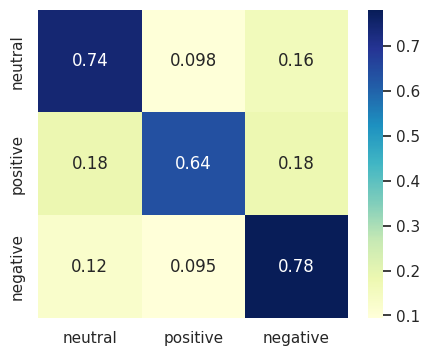

In [ ]:
# Base Model
LogReg = LogisticRegression(multi_class='multinomial')
LogReg.fit(X_train_vectorized, y_train)

# prediction
LogReg_prediction = LogReg.predict(X_test_vectorized)

# Report
model_evaluation(LogReg, y_test, LogReg_prediction)

In [ ]:
# creating a dataframe to store results
results_df_4 = pd.DataFrame(data=[["Logistic Regression", *performance_metrics(LogReg, y_test, LogReg_prediction)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])
results_df = results_df.append(results_df_4, ignore_index=True)

# **Random Forest Classifier**

RandomForestClassifier() 

Train set Accuracy:  100.0 %
Test set Accuracy:  77.0 %
Model Report: 
               precision    recall  f1-score   support

    negative       0.74      0.79      0.76      4324
     neutral       0.69      0.73      0.71      2188
    positive       0.83      0.77      0.80      5836

    accuracy                           0.77     12348
   macro avg       0.75      0.76      0.76     12348
weighted avg       0.77      0.77      0.77     12348

------------------------------------------------------------------

Confusion Matrix: 



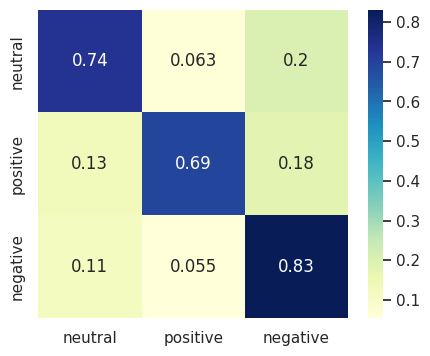

In [ ]:
# Base Model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_vectorized, y_train)

# prediction
rf_prediction = rf_clf.predict(X_test_vectorized)

# Report
model_evaluation(rf_clf, y_test, rf_prediction)


In [ ]:
# creating a dataframe to store results
results_df_5 = pd.DataFrame(data=[["Random Forest Classifier", *performance_metrics(rf_clf, y_test, rf_prediction)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])
results_df = results_df.append(results_df_5, ignore_index=True)

# **K nearest Neighbors Classifier**

KNN stands for k-Nearest Neighbors, which is a machine learning algorithm used for classification and regression. In classification, the algorithm looks at the 'k' nearest training examples from the input data point, and assigns the class label of the majority of the 'k' neighbors. In regression, it takes the average of the 'k' neighbors to predict the output. KNN is a non-parametric and lazy learning algorithm, meaning it does not assume any underlying data distribution.

KNeighborsClassifier() 

Train set Accuracy:  39.0 %
Test set Accuracy:  30.0 %
Model Report: 
               precision    recall  f1-score   support

    negative       0.16      0.74      0.27      1019
     neutral       0.96      0.21      0.35     10483
    positive       0.13      0.81      0.22       846

    accuracy                           0.30     12348
   macro avg       0.42      0.59      0.28     12348
weighted avg       0.84      0.30      0.33     12348

------------------------------------------------------------------

Confusion Matrix: 



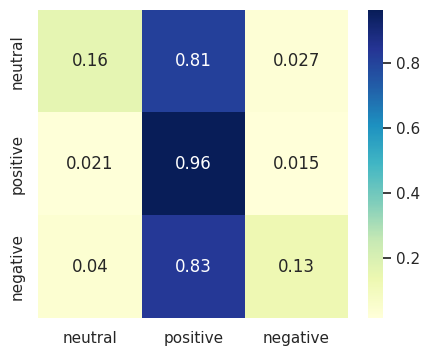

In [ ]:
# Base Model
knn = KNeighborsClassifier()
knn.fit(X_train_vectorized, y_train)

# predicted 
pred_knn = knn.predict(X_test_vectorized)

# Report
model_evaluation(knn, y_test, pred_knn)


In [ ]:
# creating a dataframe to store results
results_df_6 = pd.DataFrame(data=[["K nearest neighbour ", *performance_metrics(knn , y_test, pred_knn)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])
results_df = results_df.append(results_df_6, ignore_index=True)

# **Model Comparison**

In [ ]:
results_df = results_df.drop_duplicates(subset=['Model'])
results_df

,Model,Train_Accuracy,Test_Accuracy,F1_Score
0,Naive Bayes Classifier,88.0,64.0,"[0.666, 0.476, 0.687]"
1,Support Vector Machine,96.0,78.0,"[0.789, 0.677, 0.817]"
2,AdaBoosted Decision Trees,85.0,79.0,"[0.785, 0.744, 0.824]"
3,Logistic Regression,100.0,74.0,"[0.749, 0.62, 0.783]"
4,Random Forest Classifier,100.0,77.0,"[0.761, 0.711, 0.799]"
5,K nearest neighbour,39.0,30.0,"[0.267, 0.349, 0.22]"


Support Vector Machine and AdaBoost performed better than the other four classifiers, with Support Vector Machine having a slight advantage with a mean F1 score of around 0.77 combined while overall model accuracy is 78%. Thus, Now its time to tune the model to get the best results out of it.

# **Hyper-Parameter Tuning on Multiclass**

I have selected GridSearchCV for tuning. GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique.

In [ ]:
# Applying HyperTunning on Base Model
grid_params ={'C': [2.5], 'gamma': [0.001],
              'kernel': ['rbf'],'decision_function_shape':['ovr']}

GSCV_SVC_clf = GridSearchCV(SVC_Model, grid_params, refit = True, cv = 5,
                            verbose = 3, return_train_score = True,
                            scoring = 'accuracy')

%time GSCV_SVC_clf.fit(X_train_vectorized, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=2.5, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.985, test=0.786) total time= 3.7min
[CV 2/5] END C=2.5, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.986, test=0.782) total time= 3.5min
[CV 3/5] END C=2.5, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.985, test=0.785) total time= 4.4min
[CV 4/5] END C=2.5, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.985, test=0.776) total time= 3.6min
[CV 5/5] END C=2.5, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.985, test=0.780) total time= 3.6min
CPU times: user 30min 29s, sys: 2.55 s, total: 30min 31s
Wall time: 31min 51s


GridSearchCV(cv=5, estimator=SVC(max_iter=10000),
             param_grid={'C': [2.5], 'decision_function_shape': ['ovr'],
                         'gamma': [0.001], 'kernel': ['rbf']},
             return_train_score=True, scoring='accuracy', verbose=3)

SVC(C=2.5, gamma=0.001, max_iter=10000) 

Train set Accuracy:  98.0 %
Test set Accuracy:  80.0 %
Model Report: 
               precision    recall  f1-score   support

    negative       0.79      0.82      0.80      4454
     neutral       0.71      0.72      0.71      2294
    positive       0.85      0.82      0.83      5600

    accuracy                           0.80     12348
   macro avg       0.78      0.78      0.78     12348
weighted avg       0.80      0.80      0.80     12348

------------------------------------------------------------------

Confusion Matrix: 



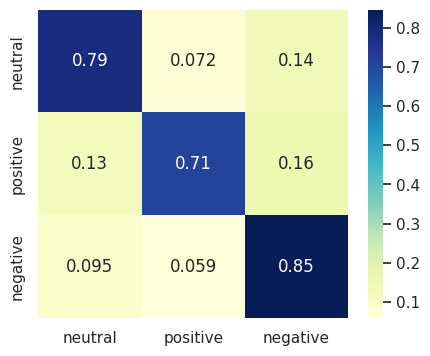

In [ ]:
# Return set of parameters
Tuned_SVC_clf = GSCV_SVC_clf.best_estimator_

# Checking the prediction and performance of HyperTuned Model  
Tuned_SVC_clf_pred = Tuned_SVC_clf.predict(X_test_vectorized)

model_evaluation(Tuned_SVC_clf, y_test, Tuned_SVC_clf_pred) 

# **Building Classification Model (Binary Classification)**

Binary classification is generally faster than multiclass classification in sentiment analysis because it only requires two decision boundaries instead of multiple. Additionally, binary classification can be more accurate than multiclass classification because it does not require assigning a score to each class, which can be difficult to do with a large number of classes.

In [ ]:
#Encoded multiclass to Binary class
tweet_data_encoded = df1.copy()

tweet_data_encoded["Sentiment"]= tweet_data_encoded["Sentiment"].replace('Positive',1) 
tweet_data_encoded["Sentiment"]= tweet_data_encoded["Sentiment"].replace('Extremely Positive',1) 
tweet_data_encoded["Sentiment"]= tweet_data_encoded["Sentiment"].replace('Neutral',1) 
tweet_data_encoded["Sentiment"]= tweet_data_encoded["Sentiment"].replace('Negative',0) 
tweet_data_encoded["Sentiment"]= tweet_data_encoded["Sentiment"].replace('Extremely Negative',0) 

In [ ]:
#assign X as a independent variable and y as a dependent variable
X = tweet_data_encoded['stemmed']
Y = tweet_data_encoded['Sentiment']
     

In [ ]:
#spliting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3,random_state = 42)

In [ ]:
#shape of training and testing dataset
print(f'X_train.shape :{X_train.shape}')
print(f'Y_train.shape :{Y_train.shape}')
print(f'X_test.shape :{X_test.shape}')
print(f'Y_test.shape :{Y_test.shape}')

X_train.shape :(28809,)
Y_train.shape :(28809,)
X_test.shape :(12348,)
Y_test.shape :(12348,)


In [ ]:
IDF_vec = TfidfVectorizer(norm = None)
# Applying vectorization on features
X_train = IDF_vec.fit_transform(X_train.values)
X_test = IDF_vec.transform(X_test.values)

In [ ]:
#shape of training and testing dataset
print(f'X_train.shape :{X_train.shape}')
print(f'Y_train.shape :{Y_train.shape}')
print(f'X_test.shape :{X_test.shape}')
print(f'Y_test.shape :{Y_test.shape}')

X_train.shape :(28809, 36492)
Y_train.shape :(28809,)
X_test.shape :(12348, 36492)
Y_test.shape :(12348,)


# **Model Implementation**

In [ ]:
def model_evaluation(model, true, predicted):
  
  """Function which gives output of the model implimentation on train 
  and test set (Used as Output Display) """

  train_accuracy = model.score(X_train, Y_train)
  test_accuracy = accuracy_score(true, predicted)
  report = classification_report(predicted, true)

  print(model,'\n')
  print('Train set Accuracy: ',round((train_accuracy), 2)*100,'%')
  print('Test set Accuracy: ',round((test_accuracy), 2)*100,'%')
  print('Model Report: \n', report)
  print('------------------------------------------------------------------\n')
  print('Confusion Matrix: \n')
  cm = metrics.confusion_matrix(true, predicted)
  cm = cm / np.sum(cm, axis = 1)[:,None]
  labels = Y.unique()
  sns.set(rc={'figure.figsize':[5,4]})
  sns.heatmap(cm, xticklabels = labels,
            yticklabels = labels, 
            annot=True, 
            cmap = 'YlGnBu')
  plt.show()
  plt.pause(0.05)

In [ ]:
def performance_metrics(model, true, predicted):
  
  """ Function which evaluates the model and saves the data 
  (Used for making a Comparison table) """

  train_accuracy = model.score(X_train, Y_train)
  test_accuracy = accuracy_score(true, predicted)
  f1_accuracy = f1_score(true, predicted, average=None)

  return round((train_accuracy), 2)*100, round((test_accuracy), 2)*100, np.round(f1_accuracy, 3)

# **Binary Classification**

# **Naive Bayes Classifier**

MultinomialNB() 

Train set Accuracy:  91.0 %
Test set Accuracy:  73.0 %
Model Report: 
               precision    recall  f1-score   support

           0       0.72      0.62      0.67      5296
           1       0.74      0.81      0.78      7052

    accuracy                           0.73     12348
   macro avg       0.73      0.72      0.72     12348
weighted avg       0.73      0.73      0.73     12348

------------------------------------------------------------------

Confusion Matrix: 



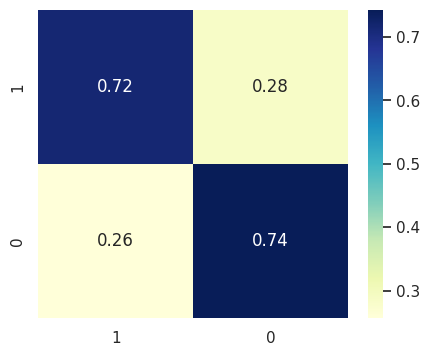

In [ ]:
#Naive Bayes Classifier model

# # Base Model
naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,Y_train)

# prediction
NB_prediction = naiveByes_clf.predict(X_test)

# Base Report
model_evaluation(naiveByes_clf, Y_test, NB_prediction)

In [ ]:
# creating a dataframe to store results
results_df1 = pd.DataFrame(data=[["Naive Bayes Classifier", *performance_metrics(naiveByes_clf, Y_test, NB_prediction)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])

# **SVM (Support Vector Machine)**

SVC(max_iter=10000) 

Train set Accuracy:  97.0 %
Test set Accuracy:  84.0 %
Model Report: 
               precision    recall  f1-score   support

           0       0.68      0.85      0.76      3732
           1       0.93      0.83      0.88      8616

    accuracy                           0.84     12348
   macro avg       0.80      0.84      0.82     12348
weighted avg       0.85      0.84      0.84     12348

------------------------------------------------------------------

Confusion Matrix: 



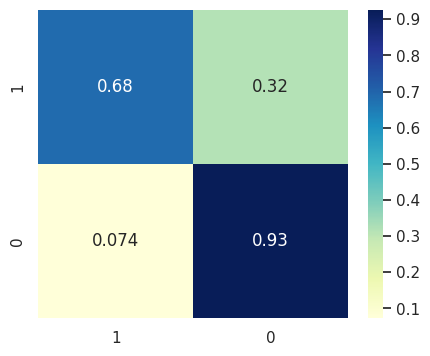

In [ ]:
# Base Model
SVC_Model = SVC(max_iter=10000)
SVC_Model.fit(X_train , Y_train)

# prediction
SVC_prediction = SVC_Model.predict(X_test)

# Report
model_evaluation(SVC_Model, Y_test, SVC_prediction)

In [ ]:
# creating a dataframe to store results
results_df_2 = pd.DataFrame(data=[["Support Vector Machine", *performance_metrics(SVC_Model, Y_test, SVC_prediction)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])
results_df1 = results_df1.append(results_df_2, ignore_index=True)

# **AdaBoosted Decision Trees**

CPU times: user 32.7 s, sys: 48.6 ms, total: 32.7 s
Wall time: 33 s
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=300) 

Train set Accuracy:  91.0 %
Test set Accuracy:  84.0 %
Model Report: 
               precision    recall  f1-score   support

           0       0.73      0.82      0.77      4117
           1       0.90      0.85      0.87      8231

    accuracy                           0.84     12348
   macro avg       0.82      0.83      0.82     12348
weighted avg       0.85      0.84      0.84     12348

------------------------------------------------------------------

Confusion Matrix: 



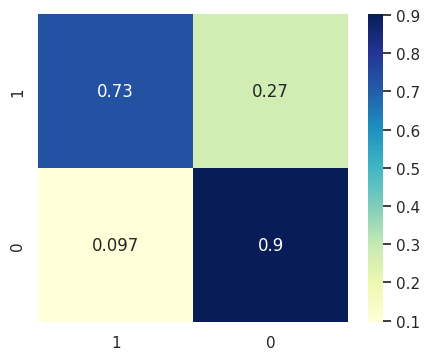

In [ ]:
# Base Model
AdaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=300, learning_rate = 0.5, algorithm="SAMME.R")

%time AdaBoost.fit(X_train, Y_train)

# prediction
AdaBoost_prediction = AdaBoost.predict(X_test)

# Report  
model_evaluation(AdaBoost, Y_test, AdaBoost_prediction) 

In [ ]:
# creating a dataframe to store results
results_df_3 = pd.DataFrame(data=[["AdaBoosted Decision Trees", *performance_metrics(AdaBoost, Y_test, AdaBoost_prediction)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])
results_df1 = results_df1.append(results_df_3, ignore_index=True)

# **Logistic Regression**

LogisticRegression(multi_class='multinomial') 

Train set Accuracy:  100.0 %
Test set Accuracy:  81.0 %
Model Report: 
               precision    recall  f1-score   support

           0       0.74      0.75      0.74      4542
           1       0.85      0.84      0.85      7806

    accuracy                           0.81     12348
   macro avg       0.80      0.80      0.80     12348
weighted avg       0.81      0.81      0.81     12348

------------------------------------------------------------------

Confusion Matrix: 



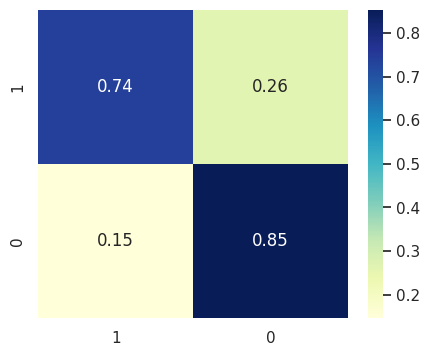

In [ ]:
# Base Model
LogReg = LogisticRegression(multi_class='multinomial')
LogReg.fit(X_train, Y_train)

# prediction
LogReg_prediction = LogReg.predict(X_test)

# Report
model_evaluation(LogReg, Y_test, LogReg_prediction)

In [ ]:
# creating a dataframe to store results
results_df_4 = pd.DataFrame(data=[["Logistic Regression", *performance_metrics(LogReg, Y_test, LogReg_prediction)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])
results_df1 = results_df1.append(results_df_4, ignore_index=True)

# **Random Forest Classifier**

RandomForestClassifier() 

Train set Accuracy:  100.0 %
Test set Accuracy:  82.0 %
Model Report: 
               precision    recall  f1-score   support

           0       0.69      0.81      0.75      3969
           1       0.90      0.83      0.86      8379

    accuracy                           0.82     12348
   macro avg       0.80      0.82      0.81     12348
weighted avg       0.83      0.82      0.83     12348

------------------------------------------------------------------

Confusion Matrix: 



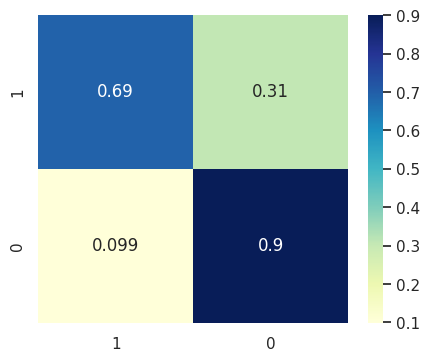

In [ ]:
# Base Model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)

# prediction
rf_prediction = rf_clf.predict(X_test)

# Report
model_evaluation(rf_clf, Y_test, rf_prediction)


In [ ]:
# creating a dataframe to store results
results_df_5 = pd.DataFrame(data=[["Random Forest Classifier", *performance_metrics(rf_clf, Y_test, rf_prediction)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])
results_df1 = results_df1.append(results_df_5, ignore_index=True)

# **K Nearest Neighbours Classifier**

KNeighborsClassifier() 

Train set Accuracy:  69.0 %
Test set Accuracy:  66.0 %
Model Report: 
               precision    recall  f1-score   support

           0       0.12      0.80      0.21       720
           1       0.98      0.65      0.78     11628

    accuracy                           0.66     12348
   macro avg       0.55      0.72      0.50     12348
weighted avg       0.93      0.66      0.75     12348

------------------------------------------------------------------

Confusion Matrix: 



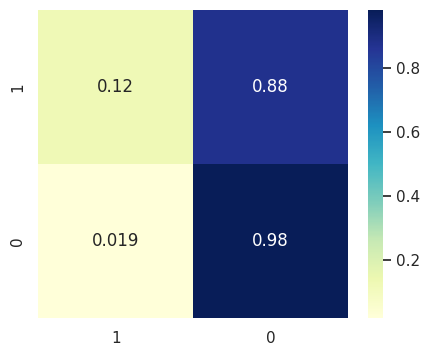

In [ ]:
# Base Model
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

# predicted 
pred_knn = knn.predict(X_test)

# Report
model_evaluation(knn, Y_test, pred_knn)


In [ ]:
# creating a dataframe to store results
results_df_6 = pd.DataFrame(data=[["K nearest neighbour ", *performance_metrics(knn , Y_test, pred_knn)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'F1_Score'])
results_df1 = results_df1.append(results_df_6, ignore_index=True)

# **Comparison of all Binary class models**

In [ ]:
results_df1 = results_df1.drop_duplicates(subset=['Model'])
results_df1

,Model,Train_Accuracy,Test_Accuracy,F1_Score
0,Naive Bayes Classifier,91.0,73.0,"[0.667, 0.777]"
1,Support Vector Machine,97.0,84.0,"[0.757, 0.876]"
2,AdaBoosted Decision Trees,91.0,84.0,"[0.771, 0.875]"
3,Logistic Regression,100.0,81.0,"[0.744, 0.849]"
4,Random Forest Classifier,100.0,82.0,"[0.747, 0.865]"
5,K nearest neighbour,69.0,66.0,"[0.215, 0.783]"


# **Hyperparameter Tunning on Binary class for SVM**

In [ ]:
# Applying HyperTunning on Base Model
grid_params ={'C': [2.5], 'gamma': [0.001],
              'kernel': ['rbf'],'decision_function_shape':['ovr']}

GSCV_SVC_clf = GridSearchCV(SVC_Model, grid_params, refit = True, cv = 5,
                            verbose = 3, return_train_score = True,
                            scoring = 'accuracy')

%time GSCV_SVC_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=2.5, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.988, test=0.842) total time= 2.5min
[CV 2/5] END C=2.5, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.988, test=0.845) total time= 2.2min
[CV 3/5] END C=2.5, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.987, test=0.842) total time= 2.2min
[CV 4/5] END C=2.5, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.988, test=0.838) total time= 2.1min
[CV 5/5] END C=2.5, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=(train=0.989, test=0.842) total time= 2.1min
CPU times: user 19min 14s, sys: 1.72 s, total: 19min 15s
Wall time: 19min 29s


GridSearchCV(cv=5, estimator=SVC(max_iter=10000),
             param_grid={'C': [2.5], 'decision_function_shape': ['ovr'],
                         'gamma': [0.001], 'kernel': ['rbf']},
             return_train_score=True, scoring='accuracy', verbose=3)

SVC(C=2.5, gamma=0.001, max_iter=10000) 

Train set Accuracy:  99.0 %
Test set Accuracy:  85.0 %
Model Report: 
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      4101
           1       0.91      0.85      0.88      8247

    accuracy                           0.85     12348
   macro avg       0.83      0.84      0.83     12348
weighted avg       0.85      0.85      0.85     12348

------------------------------------------------------------------

Confusion Matrix: 



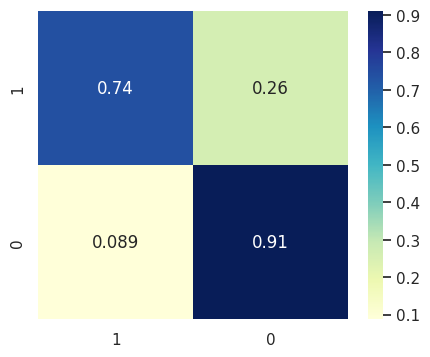

In [ ]:
# Return set of parameters
Tuned_SVC_clf = GSCV_SVC_clf.best_estimator_

# Checking the prediction and performance of HyperTuned Model  
Tuned_SVC_clf_pred = Tuned_SVC_clf.predict(X_test)

model_evaluation(Tuned_SVC_clf, Y_test, Tuned_SVC_clf_pred) 

# **Hyperparameter Tuning on Binary class for Logistic regression**

In [ ]:
#Hyperparameter tunning for LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.8455346571406533


LogisticRegression(C=0.01) 

Train set Accuracy:  95.0 %
Test set Accuracy:  85.0 %
Model Report: 
               precision    recall  f1-score   support

           0       0.73      0.83      0.78      4071
           1       0.91      0.85      0.88      8277

    accuracy                           0.85     12348
   macro avg       0.82      0.84      0.83     12348
weighted avg       0.85      0.85      0.85     12348

------------------------------------------------------------------

Confusion Matrix: 



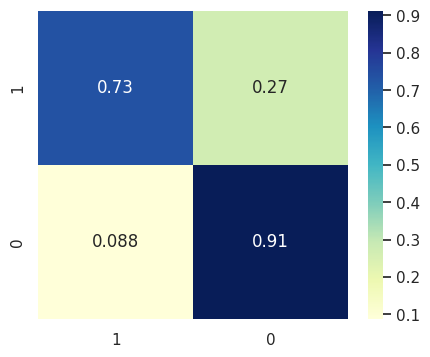

In [ ]:
#accuracy after hyperparameter tunning
Logreg_cv = logreg_cv.best_estimator_

logreg_cv_prediction = logreg_cv.predict(X_test)

model_evaluation(Logreg_cv , Y_test, logreg_cv_prediction) 


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For Covid-19 Tweet Sentiment Analysis, I would consider the following evaluation metrics: 

1. **Accuracy**: This metric measures the percentage of correctly predicted labels. It is a good choice for sentiment analysis because it shows how accurately the model can classify the sentiment of a tweet.

2. **Precision**: This metric measures the percentage of correctly predicted positive labels among all the predicted labels. It is a good choice for sentiment analysis because it can help to minimize false positives.

3. **Recall**: This metric measures the percentage of correctly predicted positive labels among all the actual labels. It is a good choice for sentiment analysis because it can help to minimize false negatives.

4. **F1 Score**: This metric is the harmonic mean of precision and recall. It is a good choice for sentiment analysis because it can combine both precision and recall into a single metric.

I believe the best metric for this task is the **F1 Score** as it combines both precision and recall into one metric.

The most commonly used evaluation metric for sentiment analysis of COVID-19 tweets is F1 score, which is a measure of accuracy that combines precision and recall. Other metrics used to evaluate the performance of sentiment analysis models include accuracy, precision and recall.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I would choose the **Support Vector Machine (SVM)** model as my final prediction model for the COVID-19 tweet sentiment analysis. It is a powerful and reliable model that can successfully handle large datasets and non-linear data. Additionally, it is a robust model that can handle outliers and class imbalance in the data, which is important for sentiment analysis. Furthermore, it is relatively faster than other models and can accurately make predictions even with a small subset of data.

For a Multiclass Classification, SVC Base model scored 78% Overall accuracy. After which, Increase to 3% when hyper-tuned with GridSearchCV. And For a binaryclass Classification, SVC Base model and Adaboost model scored 84% Overall accuracy. After which, accuracy become 85% when hyper-tuned with GridSearchCV on SVM model and After doing hyperparameter tuning on Logistic Regression model using GridseachCV its accuracy increses to 4%.

# **Conclusion**

1. Speaking of locations, Most of the tweets has been made anonumly or without a location share, which contribute around 21% of the total tweets made globelly. On the second place, It is London and London, England both contributed around 2.5% of total tweets made globelly.

2. #coronavirus and other versions of it were the most trending hashtags during the timeline.

3. Its not a surprice that covid is the most common word used in the tweets. It made more than 12000 apperence in tweets globelly. After that mostly, Food and Survice related words were mostly used.

4. Initially, 5 taget sentiments were given for the classification later then converted into 3-Class targets i.e. POSITIVE, NEGATIVE and NEUTRAL which made Sentiment Classification a little easier.

5. For vectorization, TF-IDF vectorizer has been used, which Convert a collection of raw documents to a matrix of TF-IDF features.

6. For a Multiclass Classification, SVC Base model scored 78% Overall accuracy. After which, Increase to 3% when hyper-tuned with GridSearchCV.

7. For a binaryclass Classification, SVC Base model and Adaboost model scored 84% Overall accuracy. After which, accuracy become 85% when hyper-tuned with GridSearchCV on SVM model and After doing hyperparameter tuning on Logistic Regression model using GridseachCV its accuracy increses to 4%.

####   Out of Six models, the best model for this dataset would be SVM (Support  Vector Machine), For multiclass classification.

####   For binary classification, the best model for this dataset would be SVM and Logistic Regression.



**•** Also, we observed that no overfitting is seen for the data, and we can deploy this model.

**•** The sentiments of future tweets can be easily predicted using this model.


---


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***